# Importing Libraries

In [1]:
# importing necassry libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Reading the data 

In [2]:
# loading the data
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

In [7]:
# counting quality values
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [8]:
# balancing the quality values for better model performance 
df.replace({'quality':{3:0, 4:0, 5:0, 6:1, 7:1, 8:1 }}, inplace = True)
df['quality'].value_counts().sort_index()

0    744
1    855
Name: quality, dtype: int64

In [9]:
df['quality'].nunique()

2

In [10]:
df['alcohol'].nunique()

65

In [11]:
df['sulphates'].nunique()

96

# Data Visualization

<Figure size 864x576 with 0 Axes>

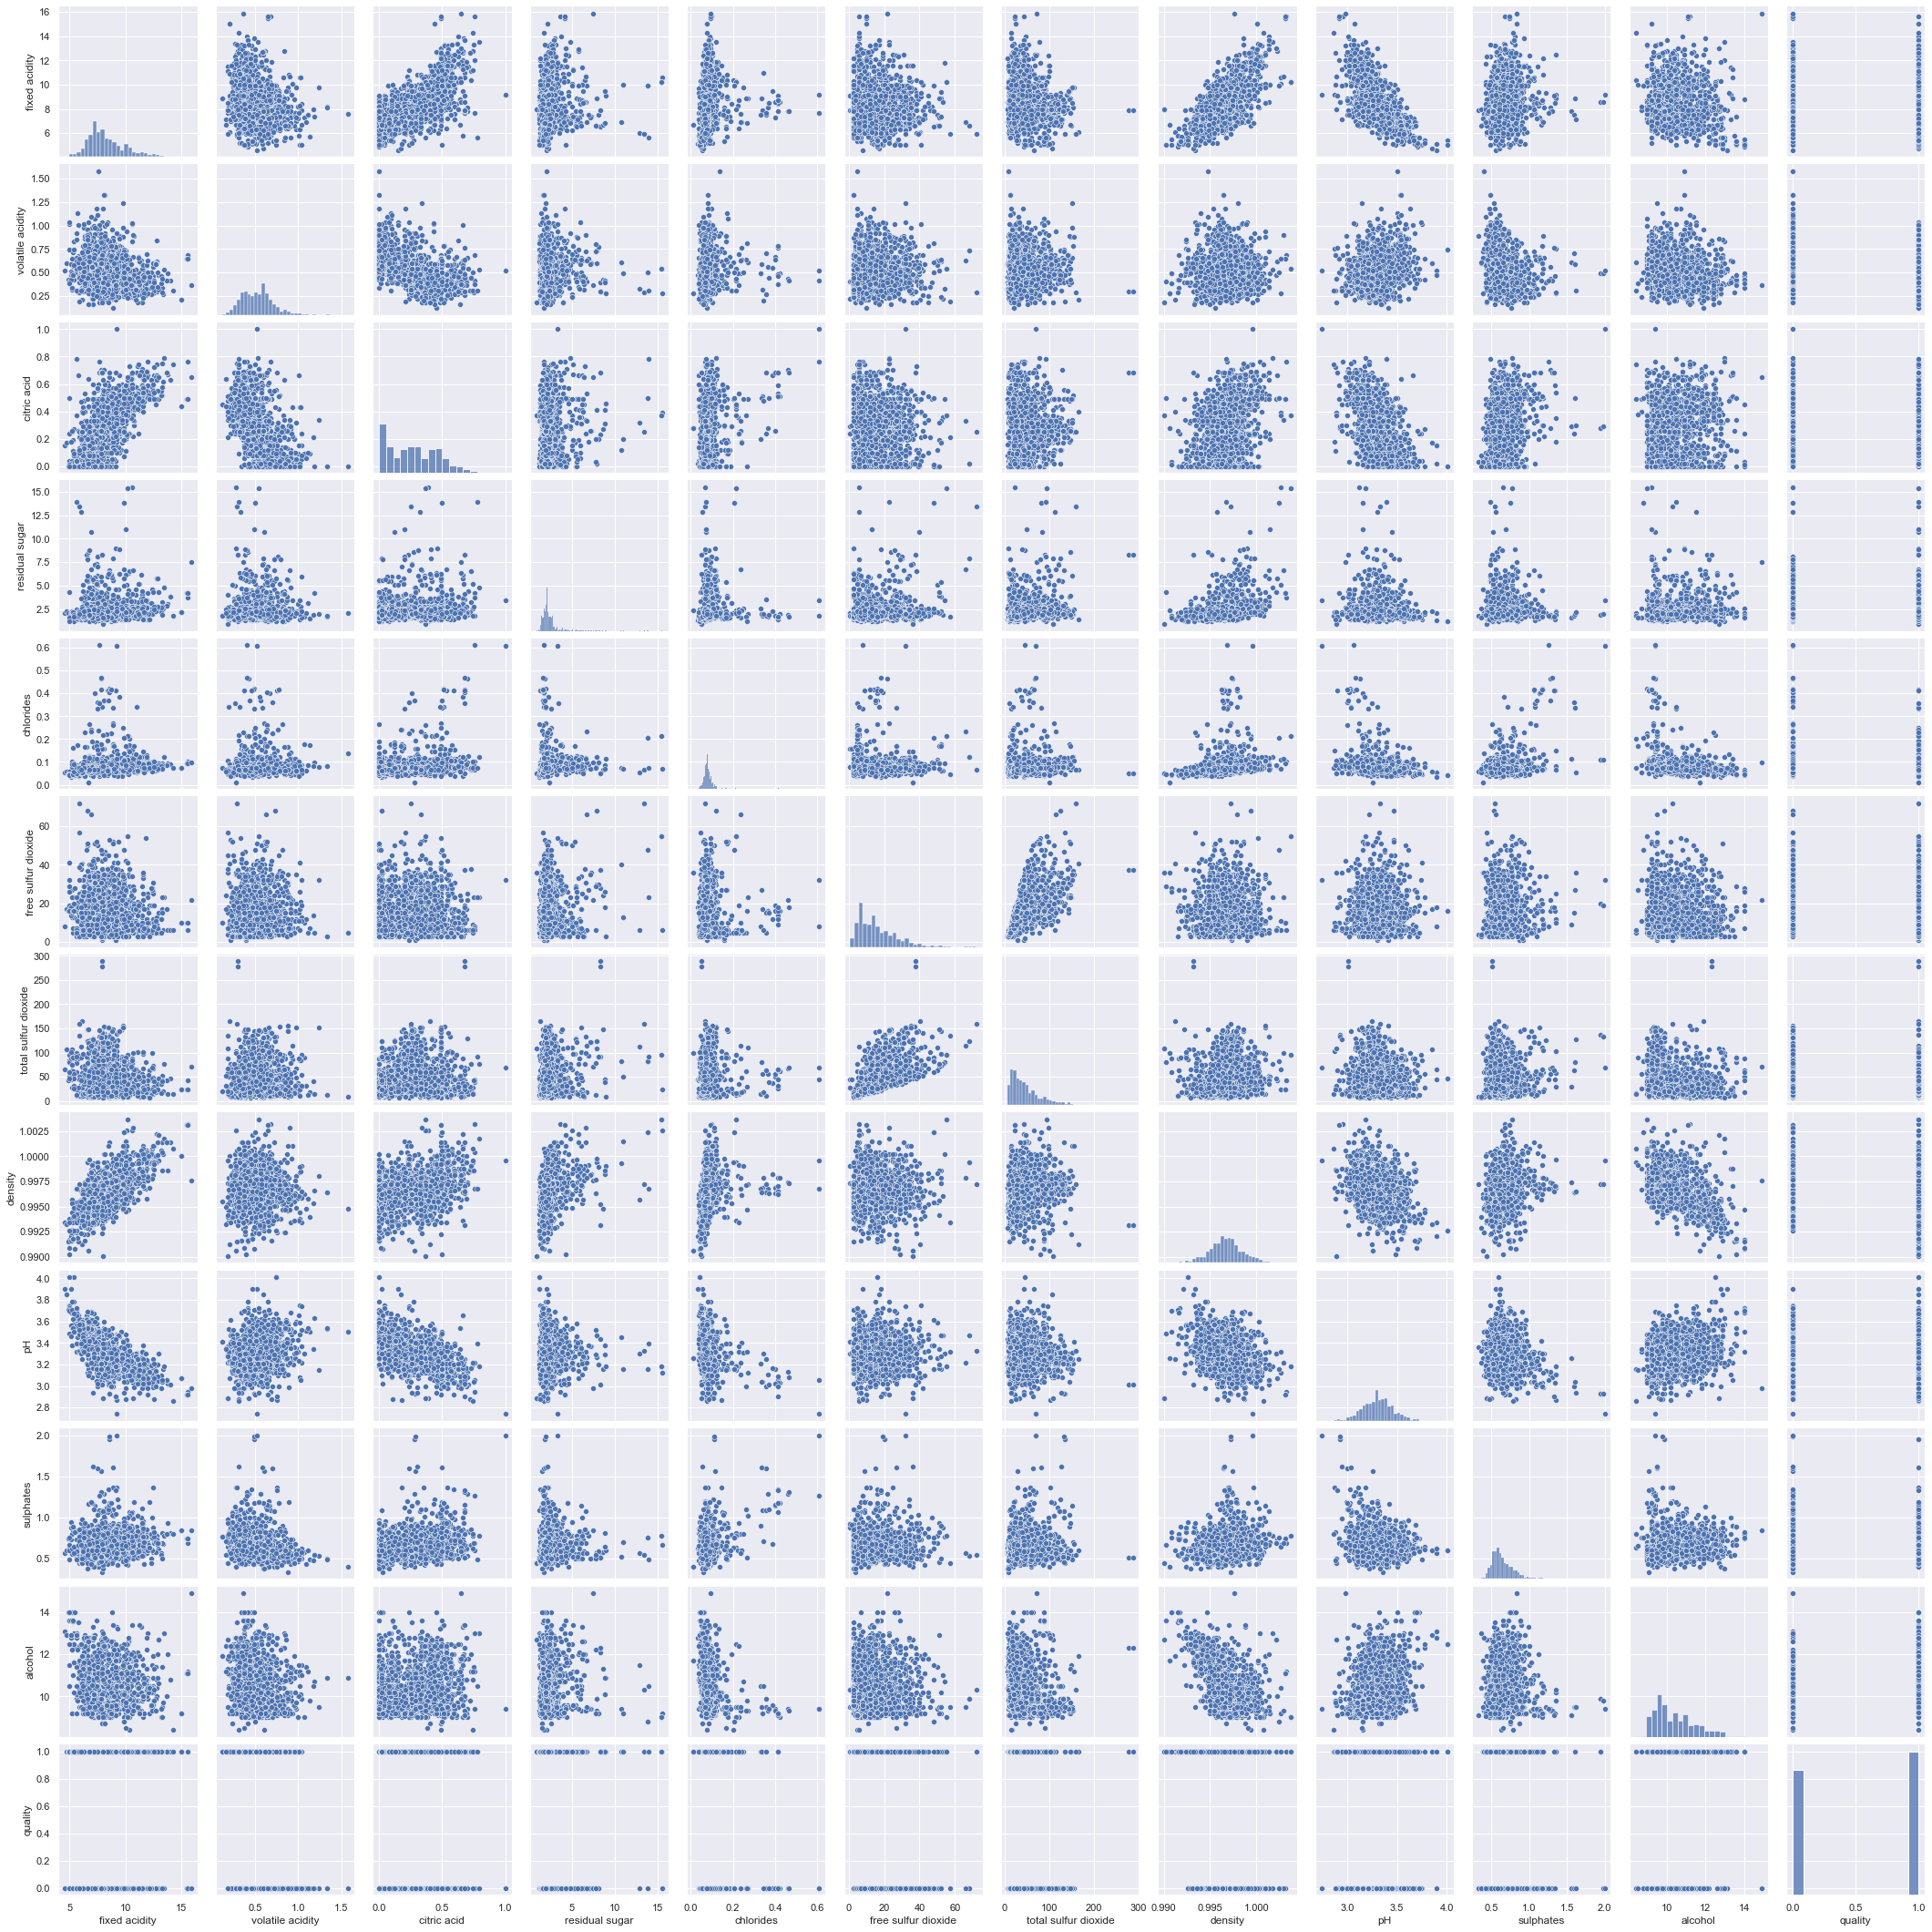

In [12]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

<AxesSubplot:xlabel='quality', ylabel='count'>

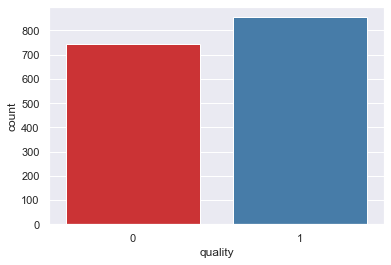

In [13]:
sns.countplot(x='quality', data=df, palette="Set1")

<AxesSubplot:>

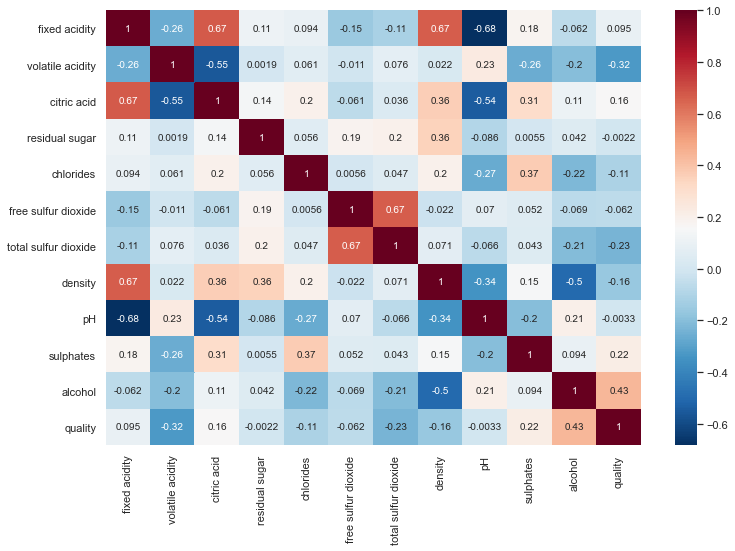

In [14]:
# looking for correlation between columns 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu_r')

### Looking for association between variables

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

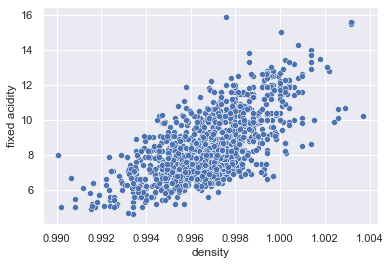

In [15]:
sns.scatterplot(x='density', y='fixed acidity', data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>

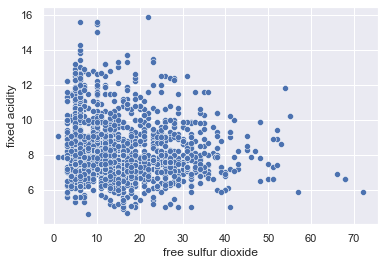

In [16]:
sns.scatterplot(x='free sulfur dioxide', y='fixed acidity', data=df)

<AxesSubplot:xlabel='density', ylabel='total sulfur dioxide'>

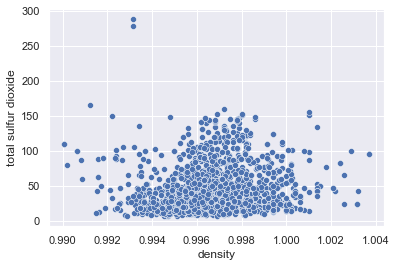

In [17]:
sns.scatterplot(x='density', y='total sulfur dioxide', data=df)

### Comparing the Quality to diffrent features 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

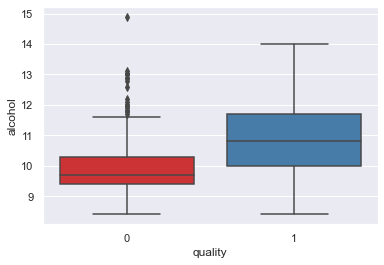

In [18]:
sns.boxplot(x='quality', y='alcohol', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='pH'>

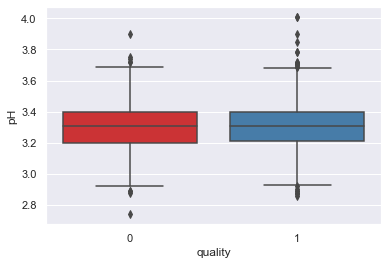

In [19]:
sns.boxplot(x='quality', y='pH', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='density'>

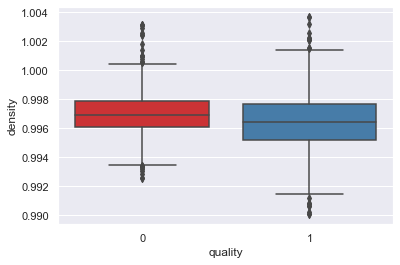

In [20]:
sns.boxplot(x='quality', y='density', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

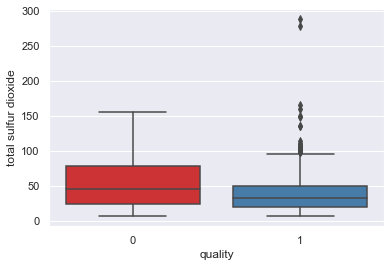

In [21]:
sns.boxplot(x='quality', y='total sulfur dioxide', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

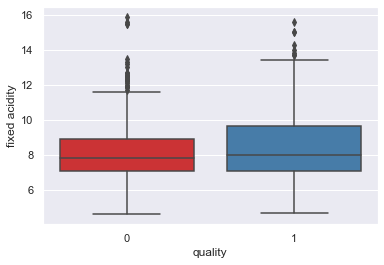

In [22]:
sns.boxplot(x='quality', y='fixed acidity', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

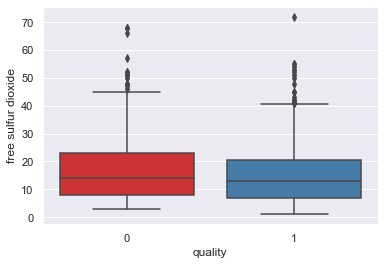

In [23]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=df, palette="Set1")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

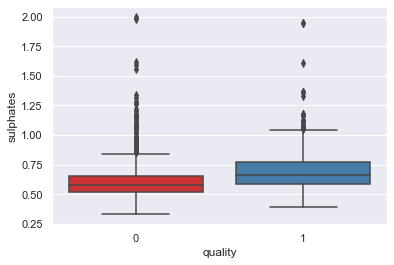

In [24]:
sns.boxplot(x='quality', y='sulphates', data=df, palette="Set1")

# Split

In [25]:
X = df.drop('quality', axis=1)
y = df['quality']

# Scaling the Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
sc.fit(X)

StandardScaler()

In [29]:
scaled_features = sc.transform(X)

In [30]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

# Train & Test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.33, random_state=42)

# Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [36]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       238
           1       0.76      0.76      0.76       290

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528

[[167  71]
 [ 69 221]]


# Random Forests

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
rfc_pred = rfc.predict(X_test)

In [43]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       238
           1       0.81      0.82      0.82       290

    accuracy                           0.80       528
   macro avg       0.80      0.79      0.79       528
weighted avg       0.80      0.80      0.80       528

[[182  56]
 [ 51 239]]


## Build Random Forest Model with hyperparameters

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split 
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]



In [67]:
# Create the param grid

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'criterion': ["gini", "entropy"]}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


### With GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [48]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [49]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [50]:
rf_grid_pred = rf_grid.predict(X_test)

In [51]:
print(classification_report(y_test,rf_grid_pred))
print(confusion_matrix(y_test,rf_grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       238
           1       0.76      0.76      0.76       290

    accuracy                           0.74       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.74      0.74      0.74       528

[[168  70]
 [ 69 221]]


### With RandomizedSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rf_randomgrid = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [70]:
rf_randomgrid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [71]:
rf_randomgrid.best_params_

{'n_estimators': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': True}

In [72]:
rf_randomgrid_pred = rf_randomgrid.predict(X_test)

In [73]:
print(classification_report(y_test,rf_randomgrid_pred))
print(confusion_matrix(y_test,rf_randomgrid_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       238
           1       0.78      0.75      0.77       290

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.75      0.75      0.75       528

[[178  60]
 [ 72 218]]


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
knn_pred = knn.predict(X_test)

## Predictions and Evaluations

In [62]:
print(confusion_matrix(y_test,knn_pred))

[[158  80]
 [ 55 235]]


In [63]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       238
           1       0.75      0.81      0.78       290

    accuracy                           0.74       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.74      0.74       528



### Choosing a K Value

In [64]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

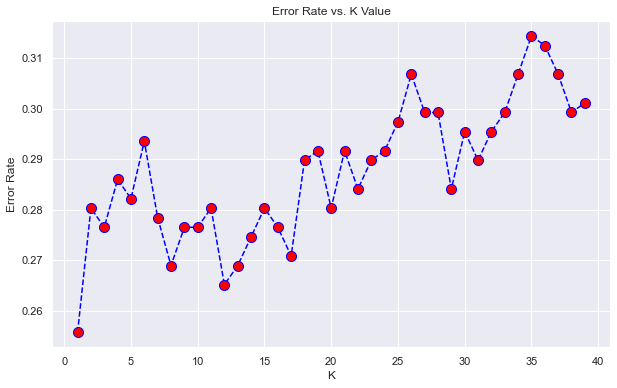

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Predictions and Evaluations

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[158  80]
 [ 55 235]]


              precision    recall  f1-score   support

           0       0.74      0.66      0.70       238
           1       0.75      0.81      0.78       290

    accuracy                           0.74       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.74      0.74       528



# Summary & Conclusion

* Random Forest was the best model for this dataset prediction with an accuracy of 80%
* Alcohol had the highest correlation with quality 